In [6]:
import matplotlib.pyplot as plt
import numpy as np

from simulation import RegularPacking, OffsetRegularPacking, LowestPointFirstPacking, ClosestFirstPacking

R = 0.1

In [25]:
p = RegularPacking(100, 1e-3)
p.generate_packing(R)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
regular_eigs = np.sort(np.linalg.eig(A.T @ K @ A)[0])
p = OffsetRegularPacking(100, 1e-3)
p.generate_packing(R)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
offset_eigs = np.sort(np.linalg.eig(A.T @ K @ A)[0])
p = LowestPointFirstPacking(100, 1e-3)
p.generate_packing(R, n_points=3000)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
lowest_eigs = np.sort(np.linalg.eig(A.T @ K @ A)[0])
p = ClosestFirstPacking(100, 1e-3)
p.generate_packing(R, n_points=3000)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
close_eigs = np.sort(np.linalg.eig(A.T @ K @ A)[0])

/home/jakeb/development/mdm-phase-b/simulation.py:221: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.incidence_matrix(


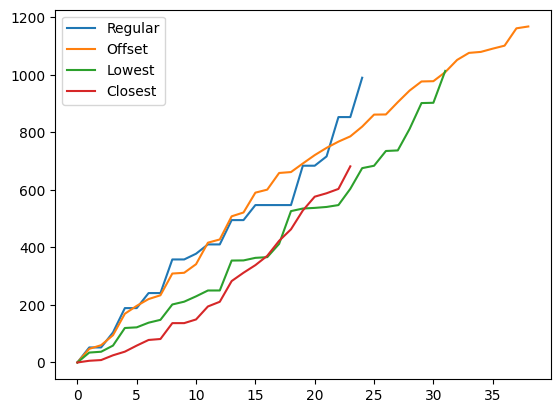

In [26]:
plt.plot(regular_eigs, label="Regular")
plt.plot(offset_eigs, label="Offset")
plt.plot(lowest_eigs, label="Lowest")
plt.plot(close_eigs, label="Closest")
plt.legend()